# Cеминар 5 (Оформление и выводы подвезу попозже ;3)

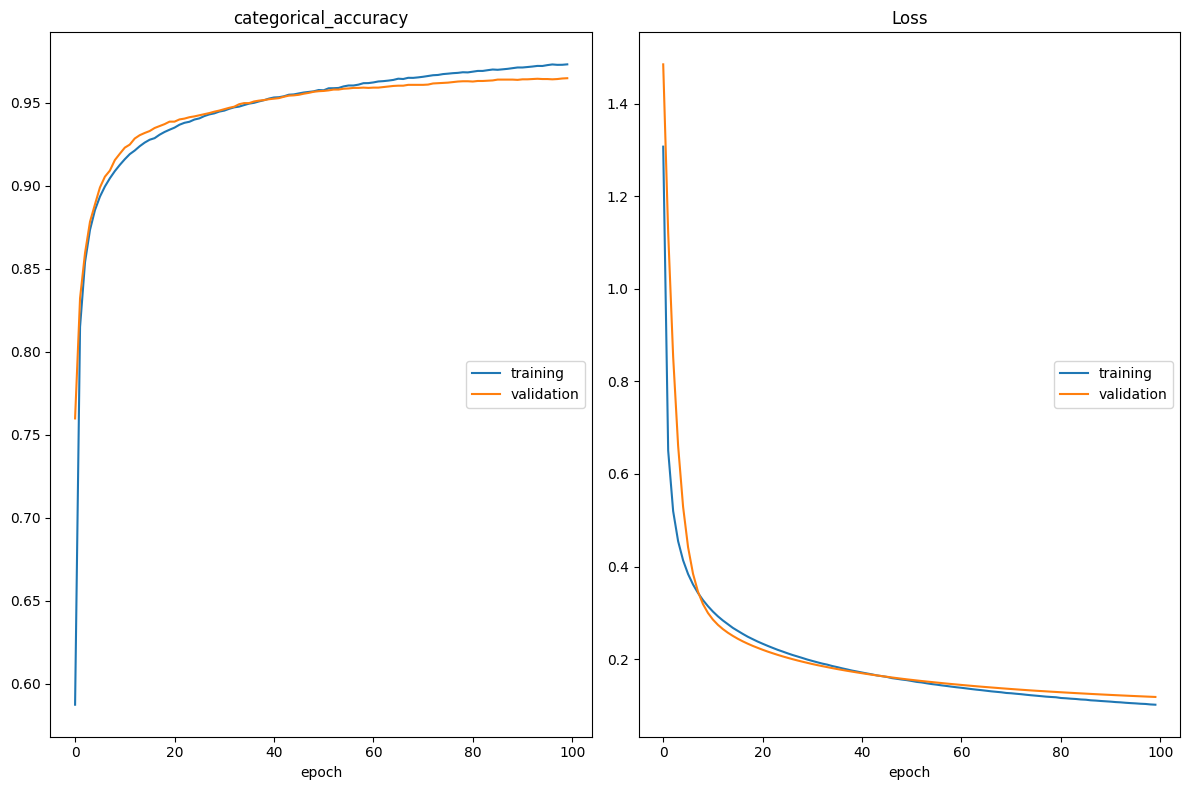

categorical_accuracy
	training         	 (min:    0.587, max:    0.973, cur:    0.973)
	validation       	 (min:    0.760, max:    0.965, cur:    0.965)
Loss
	training         	 (min:    0.102, max:    1.307, cur:    0.102)
	validation       	 (min:    0.119, max:    1.485, cur:    0.119)
313/313 - 0s - loss: 0.1210 - categorical_accuracy: 0.9658 - 476ms/epoch - 2ms/step

Test accuracy: 0.9657999873161316


In [3]:
import tensorflow as tf
from livelossplot import PlotLossesKeras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

model.summary()

mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

y_train_full_one_hot = tf.one_hot(y_train_full, 10)
y_test_one_hot = tf.one_hot(y_test, 10)

size = x_train_full.shape[0]
x_val, y_val_one_hot = x_train_full[:int(size * 0.1)], y_train_full_one_hot[:int(size * 0.1)]
x_train, y_train_one_hot = x_train_full[int(size * 0.1):], y_train_full_one_hot[int(size * 0.1):]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot))
train_dataset = train_dataset.shuffle(1024)
train_dataset = train_dataset.batch(1024)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val_one_hot)).shuffle(1024).batch(1024)

model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=100,          
          callbacks=[PlotLossesKeras(), 
                     tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)], verbose=False)

test_loss, test_acc = model.evaluate(x_test,  y_test_one_hot, verbose=2)

print('\nTest accuracy:', test_acc)